# Universidad de Buenos Aires
# Deep Learning - Examen
# Junio 2023



El examen comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el domingo 25 de junio a las 20:00hs. Toda comunicación con otros alumnos respecto del examen y la resolución de los ejercicios, queda estrictamente prohibida. Los exámenes serán comparados desde el punto de vista de la redacción, de los resultados y del código para determinar que el trabajo fue 100% individual y único. El examen es a libro abierto, pudiendo utilizar los contenidos vistos en clase y otra bibliografía. Todas las soluciones deben ser originales y si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com ) o un “link a un notebook en un github público”.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-Examen ABRIL 2023.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.



In [344]:
# Imports
import torch
import numpy as np
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn import metrics

## Ejercicio 1



Dado el grafo de cómputo de la siguiente imagen:

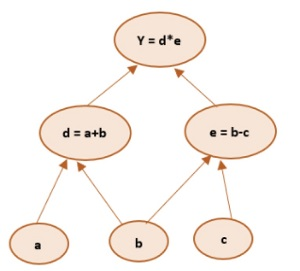

Donde a=1, b=2 y c=3

1. Realizar el paso forward y calcular Y.

2. Realizar el paso backward y calcular el backpropagation para a,b y c:

    a. En forma analítica (dy/dx = 0)

    b. Aplicando regla de la cadena

    c. Utilizando pytorch

3. Comparar los resultados del punto 2

# Resolucion Ejercicio 1

In [345]:
# Punto 1
a = 1
b = 2
c = 3
d = a + b
e = b - c
Y = d * e
Y

-3

In [346]:
# Punto 2.a
# todo

### Punto 2.b

Resuelto en img/Ejercicio1_punto2b.jpg

In [347]:
# Punto 2.c

a = torch.tensor([1.0], requires_grad=True)
b = torch.tensor([2.0], requires_grad=True)
c = torch.tensor([3.0], requires_grad=True)

d = a + b
e = b - c
y = d * e

y.backward()
print(a.grad)
print(b.grad)
print(c.grad)

tensor([-1.])
tensor([2.])
tensor([-3.])


Se observa como los resultados obtenidos usando pytorch (2.c) coinciden con los obtenidos usando la regla de la cadena (2.b)

## Ejercicio 2

Si tiene una imagen a procesar de 1024x720x3 y desea aplicar en cascada, 2 capas de convolución, seguido por una capa de activación y una de pooling,  con las siguientes características:

*Conv1:*
* tamaño kernel = 7x7
* padding = 2
* stride = 1
* número de kernel = 16

*Conv2:*
* tamaño kernel = 5x5
* padding = 0
* stride = 1
* número de kernel = 32

*activación*
* Tanh()

*pooling*
* tamaño pooling = 5x5
* padding pooling = 0
* stride pooling = 5

a) ¿Cual es el tamaño final de la salida y cuantos canales tiene?

b) Si tiene que conectar esa salida a una `fully_connected` para clasificar 3 clases ¿que tamaño debe tener?






In [348]:
def calculate_size(input, kernel_size, padding, stride):
    return int(((input + 2 * padding - kernel_size)/stride) + 1)


In [349]:
input_w_1 = 1024
input_h_1 = 720
input_k_1 = 3

output_w_1 = calculate_size(input_w_1, 7, 2, 1)
output_h_1 = calculate_size(input_h_1, 7, 2, 1)
output_k_1 = 16

input_w_2 = output_w_1
input_h_2 = output_h_1
input_k_2 = output_k_1

output_w_2 = calculate_size(input_w_2, 5, 0, 1)
output_h_2 = calculate_size(input_h_2, 5, 0, 1)
output_k_2 = 32

# capa de activacion tanh() no cambia la dimension

input_w_3 = output_w_2
input_h_3 = output_h_2
input_k_3 = output_k_2

output_w_3 = calculate_size(input_w_3, 5, 0, 5)
output_h_3 = calculate_size(input_h_3, 5, 0, 5)
output_k_3 = 32

print(f'Tamano final de salida es {output_w_3}x{output_h_3} con {output_k_3} canales')

fully_connected_classes = 3

# le sumo 1 para tener en cuenta los parametros del bias de cada clase
fully_connected_params = fully_connected_classes * (output_w_3 * output_h_3 * output_k_3 + 1)

print(f'Si tiene que conectar esa salida a una `fully_connected` para clasificar 3 clases, el input sera de {output_w_3 * output_h_3 * output_k_3}, el output de {fully_connected_classes}, por lo que la cantidad de parametros totales (pesos y bias) sera de {fully_connected_params}')

Tamano final de salida es 203x142 con 32 canales
Si tiene que conectar esa salida a una `fully_connected` para clasificar 3 clases, el input sera de 922432, el output de 3, por lo que la cantidad de parametros totales (pesos y bias) sera de 2767299


## Ejercicio 3

a) Implemente una red recurrente (como la de la imagen) que:



* Tenga como input una señal de 4 canales (4 features)
* 3 capas ocultas con 20 neuronas.
* Tenga como salida una señal de 2 canales (2 features) de igual longitud que la señal de entrada.


b) Testeear el modelo con una señal random de longitud 20.

c) Indique el total de parámetros entrenables.



![c](https://drive.google.com/uc?export=view&id=1jDMr1hOiHBgkDZepHfOaxWQcaNNntB7W)



Imagen 3 link (https://drive.google.com/file/d/1jDMr1hOiHBgkDZepHfOaxWQcaNNntB7W/view?usp=drive_link)



In [350]:
class MyRNN(torch.nn.Module):
    def __init__(self, input_size=4, hidden_size=20, num_layers=3, num_outputs=2):
        super().__init__()
        self.rnn = torch.nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = torch.nn.Linear(hidden_size, num_outputs)

    def forward(self, x):
        y, h = self.rnn(x)
        y = self.fc(y)
        return y

    def test_with_random_input(self, input_size=4, batch_size=1, test_size=20):
        input = torch.rand(batch_size, test_size, input_size)
        print('Test input')
        print(input.shape)
        print(input)
        output = self.forward(input)
        print('Test output')
        print(output.shape)
        print(output)

    def total_trainable_params(self):
        pytorch_total_params = sum(p.numel() for n, p in self.named_parameters() if p.requires_grad)
        print('Número total de parámetros a entrenar: ', pytorch_total_params)


In [351]:
rnn = MyRNN()

In [352]:
rnn.test_with_random_input()

Test input
torch.Size([1, 20, 4])
tensor([[[0.1684, 0.0872, 0.6540, 0.3508],
         [0.2205, 0.5479, 0.0861, 0.2163],
         [0.3890, 0.3354, 0.6645, 0.5940],
         [0.4087, 0.1900, 0.9596, 0.8628],
         [0.6935, 0.8109, 0.8659, 0.8452],
         [0.2307, 0.6234, 0.3574, 0.7377],
         [0.7204, 0.4674, 0.9946, 0.4733],
         [0.5726, 0.2430, 0.9137, 0.8028],
         [0.7186, 0.9341, 0.5239, 0.7647],
         [0.2701, 0.4022, 0.5277, 0.8930],
         [0.8246, 0.2169, 0.1705, 0.7711],
         [0.1629, 0.9866, 0.9993, 0.0702],
         [0.2537, 0.8312, 0.5020, 0.1266],
         [0.9047, 0.3183, 0.1159, 0.9970],
         [0.0669, 0.3875, 0.6805, 0.4911],
         [0.0132, 0.6187, 0.6974, 0.3274],
         [0.9735, 0.9042, 0.7836, 0.1644],
         [0.1724, 0.9173, 0.8047, 0.3889],
         [0.9574, 0.9624, 0.4761, 0.9622],
         [0.3776, 0.7292, 0.9256, 0.6480]]])
Test output
torch.Size([1, 20, 2])
tensor([[[-0.0471,  0.1097],
         [-0.1705,  0.2098],
         [-

In [353]:
rnn.total_trainable_params()

Número total de parámetros a entrenar:  2242


## Ejercicio 4


Se desea construir un sistema de recomendación de películas. Para esto se cuenta con un dataset de las puntuaciones que los usuarios han asignado a las peliculas disponibles.

Link dataset: https://drive.google.com/file/d/1Og9H-8oqb3_Wo_WOakeAuRR_mwr922Ar/view?usp=sharing

Para verificar la factibilidad del proyecto con datos válidos, se decide utilizar solamente las 200 películas con más votos y los usuarios que han puntuado al menos 100 películas.

1- Procesar el dataset para utilizar solamente las 200 películas con mayor cantidad de votos y los usuarios que hayan votado al menos 100 películas.

2- A partir del dataset del punto 1, construir una única red neuronal que utilice una capa de embeddings para el id de usuario, una capa de embeddings para el id de película y al menos dos capas lineales que sea capaz de predecir el puntaje que cada usuario colocó a cada pelicula.

3- Elegir un usuario al azar, una película que dicho usuario haya puntuado y verificar la predicción del modelo. Comparar con el puntaje real que el usuario asignó a dicha película.

4- Realizar una recomendación de película para el usuario del punto 3 utilizando los embeddings de usuario o los embeddings de películas. Comprobar si la recomendación es correcta haciendo una predicción del puntuaje con la red neuronal.

In [354]:
def filter_movies(df: pd.DataFrame, ranking_threshold: int):
    return df['movieId'].value_counts(ascending=False).reset_index()[0:ranking_threshold]['movieId']

In [355]:
def filter_users(df: pd.DataFrame, votes_threshold: int):
    df = df['userId'].value_counts(ascending=False).reset_index()
    return df[(df['count'] >= votes_threshold)]['userId']

In [356]:
# Constants

DATASET_PATH = './dataset/ratings.csv'
MOVIES_NUM_VOTES_RANKING_THRESHOLD = 200
USER_VOTES_THRESHOLD = 100
RANDOM_STATE = 42
SPLIT_SIZE = 0.85
EPOCHS = 100

In [357]:
def set_seed(seed: int = 42) -> None:
  np.random.seed(seed)
  torch.manual_seed(seed)
  print(f"Random seed set as {seed}")

set_seed(RANDOM_STATE)

Random seed set as 42


# Punto 1

In [358]:
def get_valid_data():
    df = pd.read_csv(DATASET_PATH)
    valid_movies = filter_movies(df, MOVIES_NUM_VOTES_RANKING_THRESHOLD)
    valid_users = filter_users(df, USER_VOTES_THRESHOLD)
    df = df[df['movieId'].isin(valid_movies) & df['userId'].isin(valid_users)].reset_index()
    return df

In [359]:
df = get_valid_data()
valid_movies = df['movieId']
valid_users = df['userId']
print(df.shape)
print(len(valid_movies.unique()))
print(len(valid_users.unique()))

(18589, 5)
200
248


In [360]:
x = df.drop(['timestamp', 'rating', 'index'], axis=1)
y = df['rating']

In [361]:
x = x.to_numpy()
y = y.to_numpy()

In [362]:
y = (y - np.min(y, axis=0)) / (np.max(y, axis=0 ) - np.min(y, axis=0))

In [363]:
def split_data_in_train_and_valid(data: pd.DataFrame, target: pd.DataFrame, split_size: float):
    idx = np.random.permutation(data.shape[0])
    train_idx = idx[0:int(split_size*len(idx))]
    valid_idx = idx[int(split_size*len(idx)):]

    train_x = data[train_idx]
    train_y = target[train_idx]
    valid_x = data[valid_idx]
    valid_y = target[valid_idx]

    return train_x, train_y, train_idx, valid_x, valid_y, valid_idx

In [364]:
train_x, train_y, train_idx, valid_x, valid_y, valid_idx = split_data_in_train_and_valid(x, y, SPLIT_SIZE)

n_train = train_x.shape[0]
n_valid = valid_x.shape[0]

In [365]:
def transform_id_to_idx(train_idx, valid_idx, ids):
    id_to_idx = {value: i for i, value in enumerate(ids.unique())}
    idx = np.array([id_to_idx[value] for value in ids])
    idx_train = idx[train_idx]
    idx_valid = idx[valid_idx]
    return idx_train, idx_valid, id_to_idx

In [366]:
movie_idx_train, movie_idx_valid, movie_ids_to_idx = transform_id_to_idx(train_idx, valid_idx, valid_movies)
user_idx_train, user_idx_valid, user_ids_to_idx = transform_id_to_idx(train_idx, valid_idx, valid_users)

In [367]:
class MyDatasetWithEmbeddings(Dataset):
  def __init__(self, movie_idx, user_idx, y):
    self.movie_idx = movie_idx
    self.user_idx = user_idx
    self.y = y

  def __len__(self):
    return self.y.shape[0]

  def __getitem__(self, idx):
    return self.movie_idx[idx], self.user_idx[idx], self.y[idx]

In [368]:
train_ds_embeddings = MyDatasetWithEmbeddings(movie_idx_train, user_idx_train, train_y)
valid_ds_embeddings = MyDatasetWithEmbeddings(movie_idx_valid, user_idx_valid, valid_y)

In [369]:
train_dataloader_emb = DataLoader(train_ds_embeddings, batch_size=64, shuffle=True)
valid_dataloader_emb = DataLoader(valid_ds_embeddings, batch_size=64)

# Punto 2

In [370]:
class NNetWithEmbeddings(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.movie_embeddings = torch.nn.Embedding(num_embeddings=200, embedding_dim=16)
    self.user_embeddings = torch.nn.Embedding(num_embeddings=248, embedding_dim=16)
    self.linear_1 = torch.nn.Linear(in_features=32, out_features=200, bias=True)
    self.relu_1 = torch.nn.ReLU()
    self.linear_2 = torch.nn.Linear(in_features=200, out_features=100, bias=True)
    self.relu_2 = torch.nn.ReLU()
    self.output = torch.nn.Linear(in_features=100, out_features=1, bias=True)

  def forward(self, movie_idx, user_idx):
    movie_embeddings_outputs = self.movie_embeddings(movie_idx)
    user_embeddings_outputs = self.user_embeddings(user_idx)
    x = torch.cat([movie_embeddings_outputs, user_embeddings_outputs], dim=1)
    x = self.linear_1(x)
    x = self.relu_1(x)
    x = self.linear_2(x)
    x = self.relu_2(x)
    x = self.output(x)
    return x

In [371]:
def get_device():
    return "cuda:0" if torch.cuda.is_available() else "cpu"

device = get_device()

In [372]:
nnnetWithEmbeddings = NNetWithEmbeddings()
nnnetWithEmbeddings = nnnetWithEmbeddings.to(device)

In [373]:
loss_function = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.Adam(nnnetWithEmbeddings.parameters(), lr=0.001, weight_decay=0.01)

In [374]:
# Mini-Batch

train_loss_by_epoch=[]
valid_loss_by_epoch=[]

for epoch in range(EPOCHS):
  ############################################
  ## Training
  ############################################
  nnnetWithEmbeddings.train(True)

  epoch_loss = 0
  epoch_y_hat = []
  epoch_y = []

  for i, data in enumerate(train_dataloader_emb):
    movie_embed_batch, user_embed_batch, y_batch = data
    movie_embed_batch = movie_embed_batch.to(device).int()
    user_embed_batch = user_embed_batch.to(device).int()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    optimizer.zero_grad()
    nnet_output = nnnetWithEmbeddings(movie_embed_batch, user_embed_batch)
    y_batch_hat = nnet_output


    loss = loss_function(nnet_output, y_batch)
    loss.backward()
    optimizer.step()

    epoch_y += list(y_batch.detach().cpu().numpy())
    epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())

    epoch_loss = epoch_loss + loss.item()

  epoch_loss = epoch_loss / n_train
  train_loss_by_epoch.append(epoch_loss)
  accuracy = 1 - metrics.mean_squared_error(epoch_y, epoch_y_hat)

  ############################################
  ## Validation
  ############################################
  nnnetWithEmbeddings.train(False)

  valid_epoch_loss = 0
  valid_epoch_y_hat = []
  valid_epoch_y = []

  for i,data in enumerate(valid_dataloader_emb):
    movie_embed_batch, user_embed_batch, y_batch = data
    movie_embed_batch = movie_embed_batch.to(device).int()
    user_embed_batch = user_embed_batch.to(device).int()
    y_batch = y_batch.to(device).float().reshape(-1, 1)

    nnet_output = nnnetWithEmbeddings(movie_embed_batch, user_embed_batch)
    y_batch_hat = nnet_output


    loss = loss_function(nnet_output, y_batch)

    valid_epoch_y += list(y_batch.detach().cpu().numpy())
    valid_epoch_y_hat += list(y_batch_hat.detach().cpu().numpy())
    valid_epoch_loss = valid_epoch_loss + loss.item()

  valid_epoch_loss = valid_epoch_loss / n_valid
  valid_loss_by_epoch.append(valid_epoch_loss)
  valid_accuracy = 1 - metrics.mean_squared_error(valid_epoch_y, valid_epoch_y_hat)

  print(f" Epoch {epoch} | " \
        f"Train/Valid loss: {epoch_loss:.3f} / {valid_epoch_loss:.3f} | " \
        f"Train/Valid accuracy: {accuracy:.3f} / {valid_accuracy:.3f}")

 Epoch 0 | Train/Valid loss: 0.057 / 0.045 | Train/Valid accuracy: 0.943 / 0.955
 Epoch 1 | Train/Valid loss: 0.042 / 0.042 | Train/Valid accuracy: 0.958 / 0.958
 Epoch 2 | Train/Valid loss: 0.038 / 0.038 | Train/Valid accuracy: 0.962 / 0.962
 Epoch 3 | Train/Valid loss: 0.035 / 0.037 | Train/Valid accuracy: 0.965 / 0.963
 Epoch 4 | Train/Valid loss: 0.034 / 0.035 | Train/Valid accuracy: 0.966 / 0.965
 Epoch 5 | Train/Valid loss: 0.032 / 0.035 | Train/Valid accuracy: 0.968 / 0.965
 Epoch 6 | Train/Valid loss: 0.032 / 0.033 | Train/Valid accuracy: 0.968 / 0.967
 Epoch 7 | Train/Valid loss: 0.031 / 0.033 | Train/Valid accuracy: 0.969 / 0.967
 Epoch 8 | Train/Valid loss: 0.031 / 0.034 | Train/Valid accuracy: 0.969 / 0.966
 Epoch 9 | Train/Valid loss: 0.031 / 0.033 | Train/Valid accuracy: 0.969 / 0.967
 Epoch 10 | Train/Valid loss: 0.030 / 0.034 | Train/Valid accuracy: 0.970 / 0.966
 Epoch 11 | Train/Valid loss: 0.030 / 0.033 | Train/Valid accuracy: 0.970 / 0.967
 Epoch 12 | Train/Valid lo

# Punto 3

In [375]:
# For one random idx in validation dataset
random_idx = np.random.randint(low=0, high=n_valid)
print(valid_users[random_idx])
print(valid_movies[random_idx])

10
6377


In [376]:
user_movies = df.loc[df['userId'] == valid_users[random_idx]]
user_movie_rating = user_movies.loc[user_movies['movieId'] == valid_movies[random_idx]]['rating']
user_movie_rating_norm = (user_movie_rating - 0.5) / (5 - 0.5)

user_movie_rating_norm

261    0.666667
Name: rating, dtype: float64

In [377]:
pred_movie_tensor = torch.tensor([movie_ids_to_idx[valid_movies[random_idx]]])
pred_user_tensor = torch.tensor([user_ids_to_idx[valid_users[random_idx]]])

In [378]:
nnnetWithEmbeddings(pred_movie_tensor, pred_user_tensor)

tensor([[0.6642]], grad_fn=<AddmmBackward0>)

Puntaje asignado realmente (normalizado): 0.666667
Puntaje predicho por el modelo (normalizado): 0.6642

# Punto 4

In [379]:
def get_user_embeddings_similarity(user_idx):
    embeddings = list(nnnetWithEmbeddings.user_embeddings.parameters())[0].detach().cpu()

    final = []
    for i in range(len(embeddings)):
      similarity = torch.cosine_similarity(embeddings[user_idx],
                                           embeddings[i].view(1, -1)).item()
      final.append(similarity)
    return final

def get_top_x_similar_embeddings(user_embeddings_similarity, user_idx, top_x):
    most_similar_embeddings_idx = np.argpartition(user_embeddings_similarity, -(top_x+1))[-(top_x+1):]
    if user_idx in most_similar_embeddings_idx:
        most_similar_embeddings_idx = np.delete(most_similar_embeddings_idx, np.where(most_similar_embeddings_idx == user_idx))
    return most_similar_embeddings_idx

user_embeddings_similarity = get_user_embeddings_similarity(user_ids_to_idx[valid_users[random_idx]]
)

top10_similar_user_idx = (get_top_x_similar_embeddings(user_embeddings_similarity, user_ids_to_idx[valid_users[random_idx]], 10))

In [380]:
top10_similar_user_idx

array([206, 125,  48, 131, 156,  51,  74, 107, 170, 120], dtype=int64)

In [381]:
user_idx_to_user_id = {i: value for i, value in enumerate(valid_users.unique())}
user_ids_to_compare = [user_idx_to_user_id[i] for i in top10_similar_user_idx]

In [382]:
user_ids_to_compare

[517, 306, 104, 314, 376, 111, 181, 265, 412, 294]

In [383]:
movie_ratings_mean = df[df['userId'].isin(user_ids_to_compare)].groupby('movieId')['rating'].agg('mean').to_frame('mean')
best_rated_movies = movie_ratings_mean[movie_ratings_mean['mean'] >= 4]

In [384]:
movie_number_votes = df[df['userId'].isin(user_ids_to_compare)].groupby('movieId')['rating'].agg('count').to_frame('count')
most_rated_movies = movie_number_votes[movie_number_votes['count'] >= 5].sort_values('count', ascending=False)

In [385]:
best_rated_movies

,mean
movieId,
32,4.000000
34,4.375000
150,4.333333
260,4.250000
292,4.250000
318,4.375000
339,4.000000
356,4.285714
364,4.000000


In [386]:
most_rated_movies

,count
movieId,
356,7
10,6
480,6
1580,6
597,6
593,6
592,6
539,6
500,6


In [387]:
movies_to_recommend = pd.concat([best_rated_movies, most_rated_movies], axis=1, join='inner').sort_values('mean', ascending=False)

In [388]:
movies_to_recommend

,mean,count
movieId,,
356,4.285714,7
260,4.250000,6


In [389]:
movies_to_recommend_ids = movies_to_recommend.index
movies_to_recommend_idx = [movie_ids_to_idx[i] for i in movies_to_recommend_ids]

In [390]:
movies_to_recommend_idx

[11, 7]

In [391]:
for i, movie_idx in enumerate(movies_to_recommend_idx):
    pred_movie_tensor = torch.tensor([movie_idx])
    pred_user_tensor = torch.tensor([user_ids_to_idx[valid_users[random_idx]]])
    output = nnnetWithEmbeddings(pred_user_tensor, pred_movie_tensor)
    print(f'movie_id: {movies_to_recommend_ids[i]}, '
          f'movie_idx: {movie_idx}, '
          f'user_idx: {user_ids_to_idx[valid_users[random_idx]]}, '
          f'norm pred_rating: {output[0][0]:.3f}')

movie_id: 356, movie_idx: 11, user_idx: 4, norm pred_rating: 0.642
movie_id: 260, movie_idx: 7, user_idx: 4, norm pred_rating: 0.853


Let's check if the user has already rated one of those movies to compare it

In [392]:
user_movies = df.loc[df['userId'] == valid_users[random_idx]]
user_movie_rating = user_movies.loc[user_movies['movieId'].isin(movies_to_recommend_ids)]
user_movie_rating['norm_rating'] = user_movie_rating.apply(lambda row: (row['rating'] - 0.5) / (5 - 0.5), axis=1)

user_movie_rating.drop(['index', 'timestamp'], axis=1)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11104\1138275041.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_movie_rating['norm_rating'] = user_movie_rating.apply(lambda row: (row['rating'] - 0.5) / (5 - 0.5), axis=1)


,userId,movieId,rating,norm_rating
246,10,356,3.5,0.666667


User has already seen movieId=356 and rated with 0.666667. Our model predicted that the user would have rated it as 0.642

We can recommend him the movieId=260 and expect a rating ~= 0.853